The dataset used for the implementation of the prototype was obtained from the following link https://doi.org/10.24432/C5K306. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## Exploratory Data Analysis

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

The features available in the dataset can be identified as follows:

### Client Attributes
* age (numeric)
* job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default: has credit in default? (categorical: "no","yes","unknown")
* housing: has housing loan? (categorical: "no","yes","unknown")
* loan: has personal loan? (categorical: "no","yes","unknown")

### Last Telephone Contact
* contact: contact communication type (categorical: "cellular","telephone") 
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other Attributes
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Social and Economic Context
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)     
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

In [183]:
# Import the data
df = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let's inspect the nature of the feature variables in the dataset.

In [184]:
df.dtypes.groupby(df.dtypes).size()

int64       5
float64     5
object     11
dtype: int64

We can observe that there are 10 numerical features and 11 categorical features.So Let's print the Numeric feature names and Categorical feature names.


In [185]:
dtypes = pd.DataFrame(df.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'duration' 'campaign' 'pdays' 'previous' 'emp.var.rate'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


### Numerical Data Analysis

Let's inspect the data for any missing values

In [186]:
df[numeric].isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

No missing values to be found. But let's visualize the data to see how they are distributed.

c:\ProgramData\anaconda3\envs\applied-ai-cw1\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\ProgramData\anaconda3\envs\applied-ai-cw1\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\ProgramData\anaconda3\envs\applied-ai-cw1\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\ProgramData\anaconda3\envs\applied-

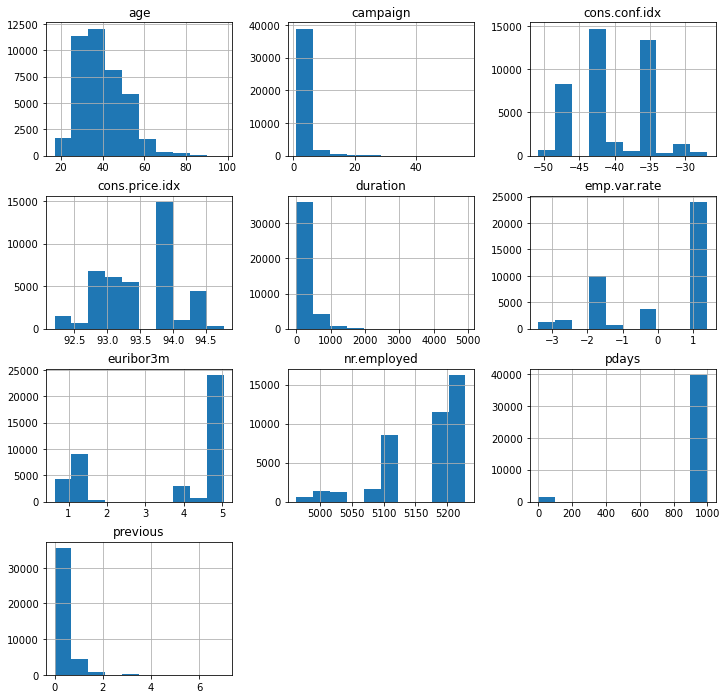

In [187]:
df[numeric].hist(figsize=(12,12));

In [188]:
df[numeric].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


It is important to identify that duration feature highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- With regards to age we can observe some outliers who are very old.
- The rest of the distributions except for `campaign` and `previous` are sparse
- `previous` could be treated as a discrete variable
- We can also note that in a majority of instances have a `pdays` value of 999 (missing) is going to be problematic if we want to use the attribute as a model feature.  Since so few instances have an associated `pdays`, we *could* remove it from the analysis and modelling process.  We could also simply add an indicator that indicates whether or not a customer was previously contacted.

Let's take a look at the distribution of `pdays` without missing instances.

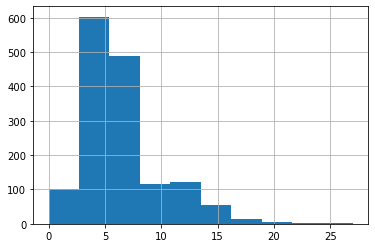

In [189]:
pdays = df.loc[df.pdays != 999, ['pdays', 'y']]
pdays.pdays.hist();

And the impact it has on the outocome.

In [190]:
pdays_999 = df.query('pdays == 999')
pdays_999.groupby('y').size() / len(pdays_999)

y
no     0.907418
yes    0.092582
dtype: float64

In [191]:
pdays.groupby('y').size() / len(pdays)

y
no     0.361716
yes    0.638284
dtype: float64

We can observe that the response rate is significantly higher for customers with an associated `pdays` value (they were previously contacted).  Customers who were previously contacted are seven times more likely to convert than customers without an associated value.  It could be that these customers were previously contacted because it was already found that they had higher response rates / the previous campaign might have leveraged a similar predictive model to identify which customers to contact.

Now let's explore a bit more to take a look at correlation between other numeric features. At technique like the Spearman rank correlation can be utilized since the data isn't normal.


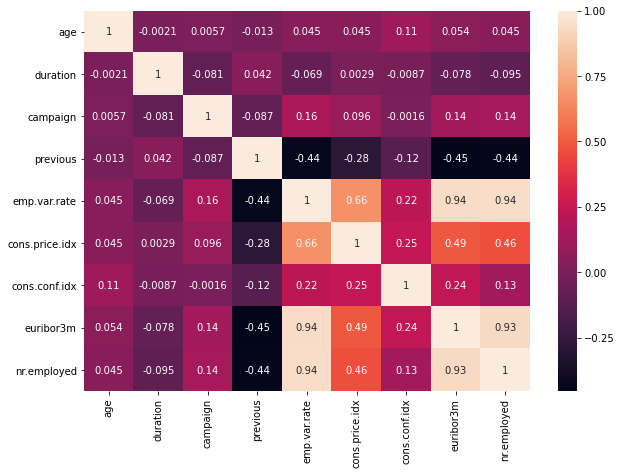

In [192]:
plt.figure(figsize=(10,7));
sns.heatmap(df[numeric].drop('pdays', axis=1).corr('spearman'), annot=True);

It can be identified that the strongest correlations are between the socioeconomic attributes

c:\ProgramData\anaconda3\envs\applied-ai-cw1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

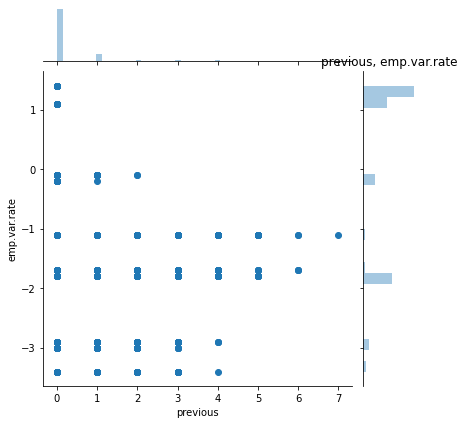

<Figure size 432x288 with 0 Axes>

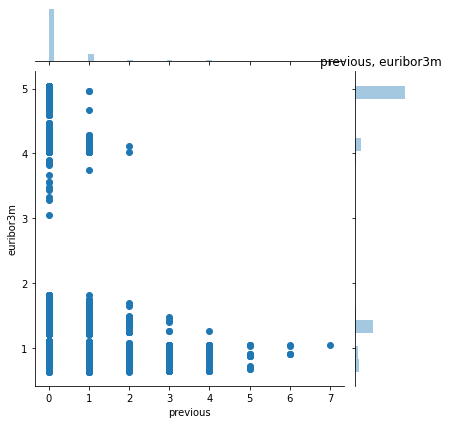

<Figure size 432x288 with 0 Axes>

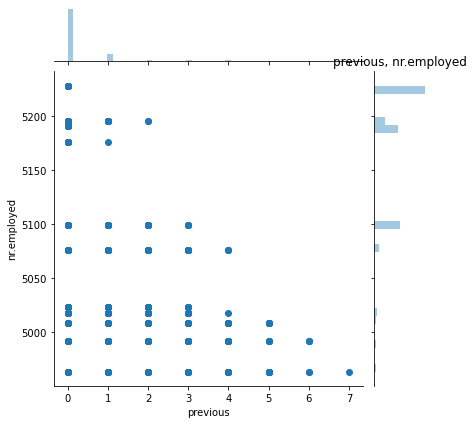

<Figure size 432x288 with 0 Axes>

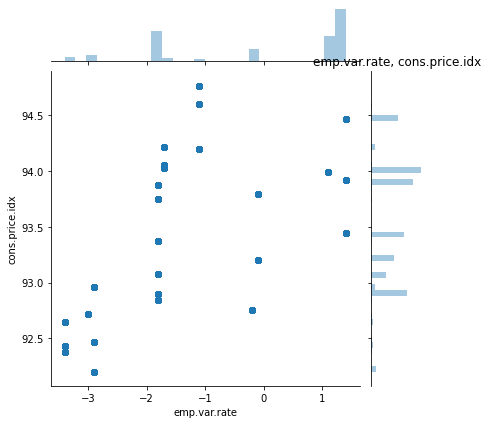

<Figure size 432x288 with 0 Axes>

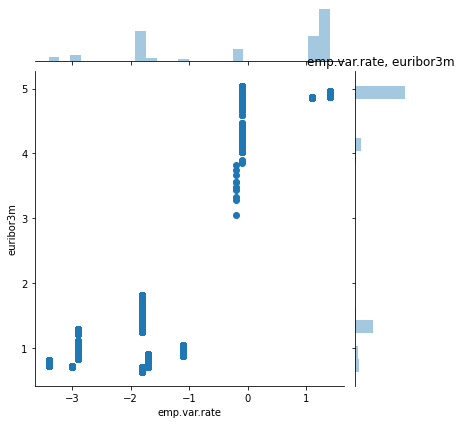

<Figure size 432x288 with 0 Axes>

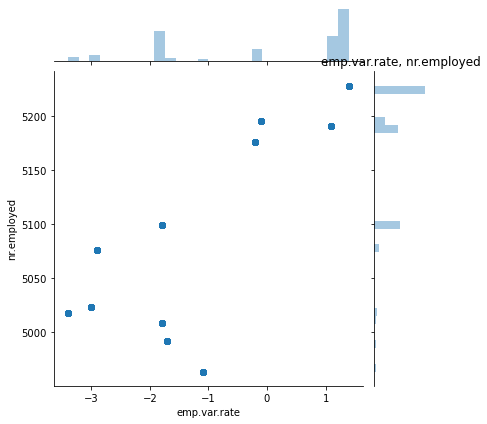

<Figure size 432x288 with 0 Axes>

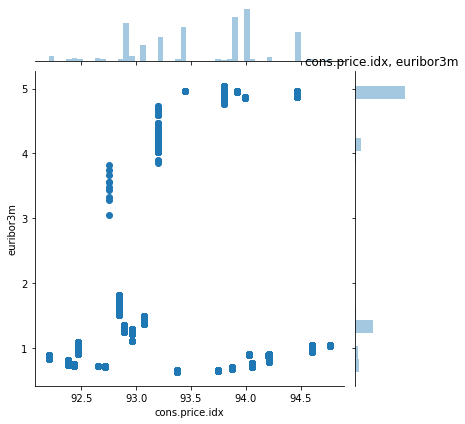

<Figure size 432x288 with 0 Axes>

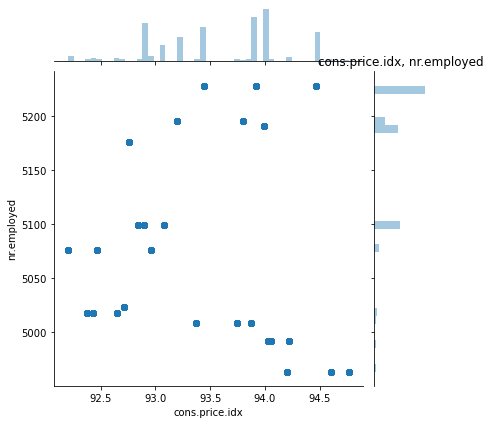

<Figure size 432x288 with 0 Axes>

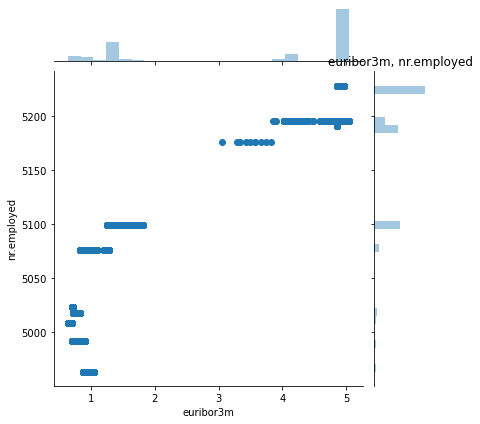

In [193]:
signif_corrs = [
  ('previous', 'emp.var.rate'),
  ('previous', 'euribor3m'),
  ('previous', 'nr.employed'),
  ('emp.var.rate', 'cons.price.idx'),
  ('emp.var.rate', 'euribor3m'),
  ('emp.var.rate', 'nr.employed'),
  ('cons.price.idx', 'euribor3m'),
  ('cons.price.idx', 'nr.employed'),
  ('euribor3m', 'nr.employed')
]

for x, y in signif_corrs:
  plt.figure();
  sns.jointplot(df[x], df[y]);
  plt.title('%s, %s' % (x, y));

Corerlations between socioeconmic and `previous` variables are not meaningful but correlations between socioeconmic attributes are, especially between:

* `emp.var.rate` (employment variation rate) and `cons.price.idx` (consumer price index)
* `emp.var.rate` and `euribor3m` (euriboro 3 month rate)
* `emp.var.rate` and `nr.employed` (number of employees)
* `nr.employed` and `euribor3m`

We'll need to determine which variables are most predictive as features and drop the less predictive features to eliminate multicollinearity.

#### Inspecting patterns in the customer attributes



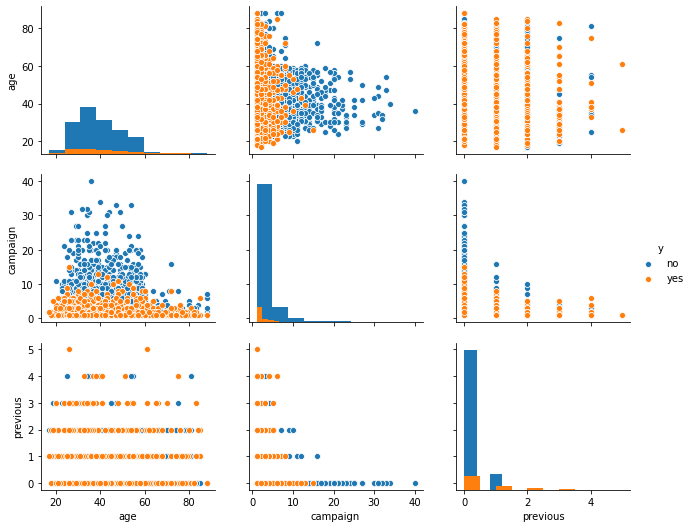

In [194]:
cust_attrs = ['age', 'campaign', 'previous', 'y']
numeric_outcome = pd.concat([df[numeric], df['y']], axis=1)
sns.pairplot(numeric_outcome[cust_attrs].sample(n=10000), hue='y', aspect=1.2, diag_kind='hist');

Between the ages of 18 and ~62, customers who were contacted more than ten times were not likely to respond to the campaign. 

c:\ProgramData\anaconda3\envs\applied-ai-cw1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


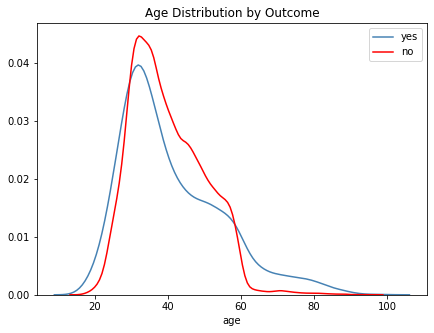

In [195]:
plt.figure(figsize=(7,5))
sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'yes', 'age'], hist=False, color='steelblue', label='yes');
sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'no', 'age'], hist=False, color='red', label='no');
plt.legend();
plt.title('Age Distribution by Outcome');

It can be observed that the Younger and older customers tend to convert more than middle-aged customers, presumably because they are looking to build savings and are looking to invest capital, respectively.

### Categorical Data Analysis

Let's inspect for any missing values in the categorical features.

In [196]:
df[categorical].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

No missing values to be found. But let's visualize the data to see how they are distributed.

Support (job)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

Support (marital)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

Support (education)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

Support (default)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

Support (housing)

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

Support (loan)

no         33950
yes         6248
unknown      990
Name: loan

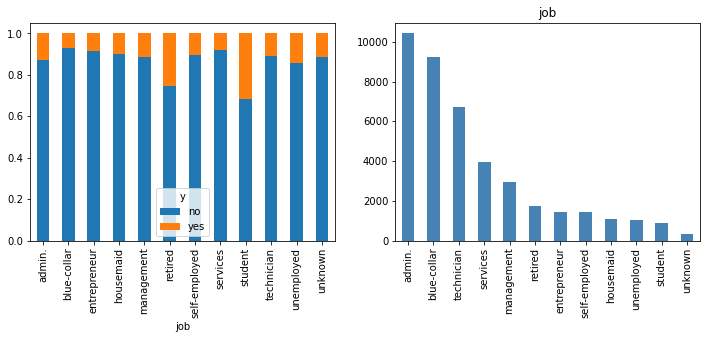

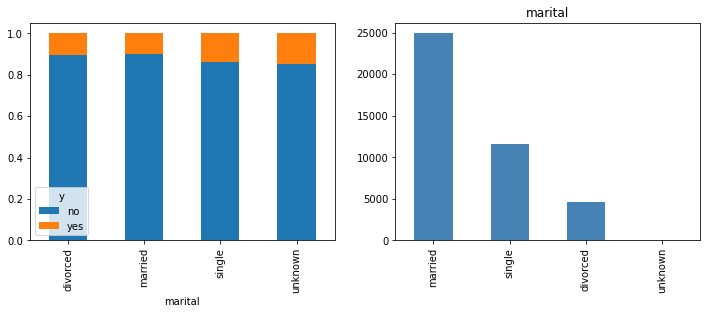

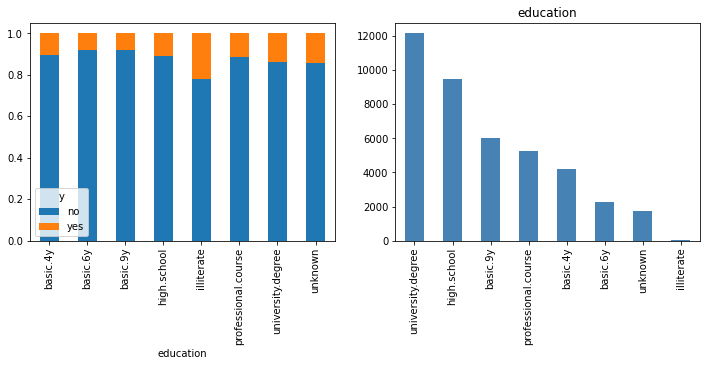

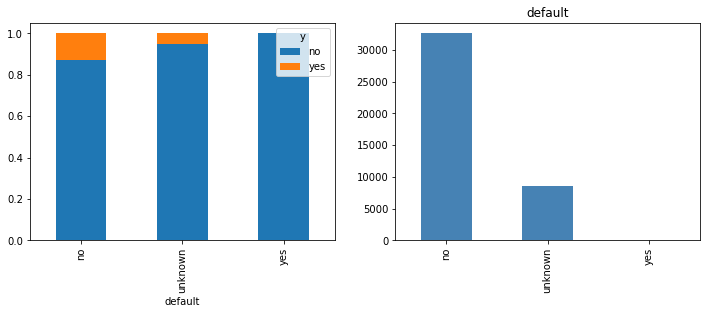

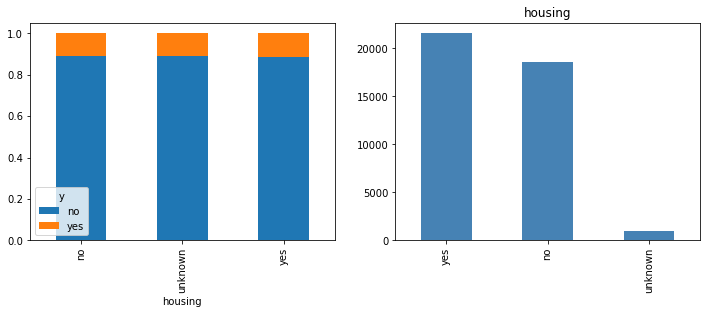

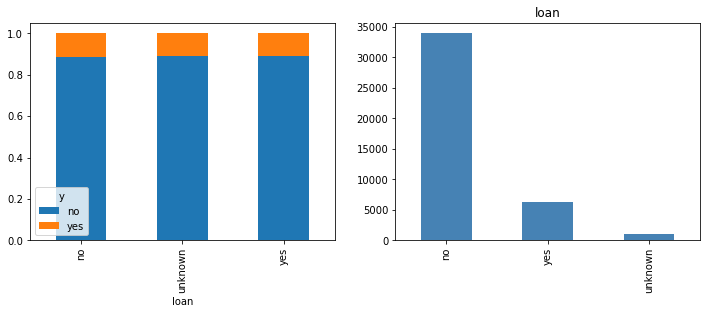

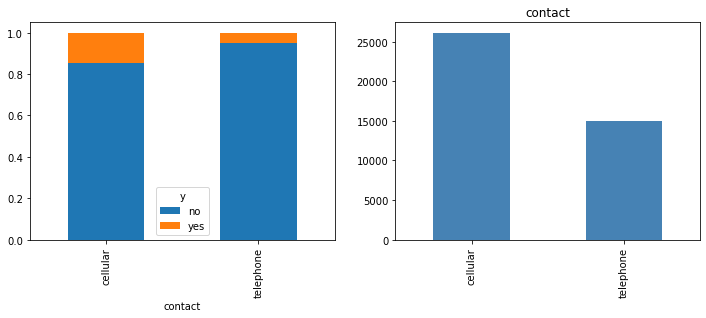

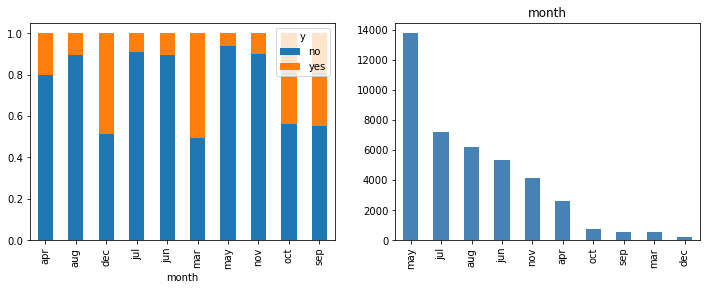

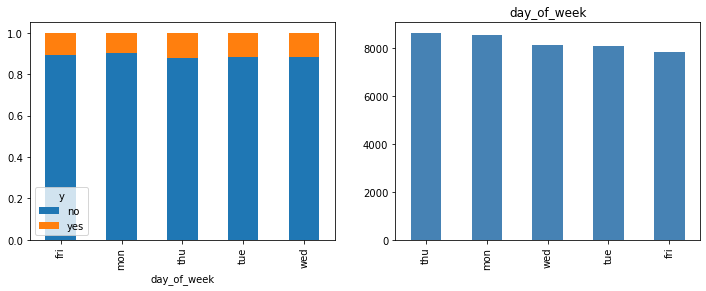

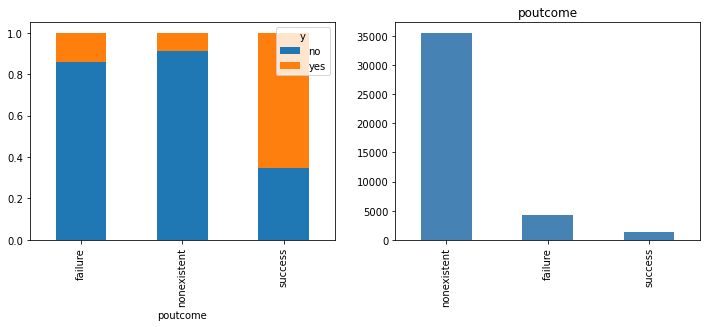

In [197]:
for attr in categorical:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  outcome_counts = df.groupby([attr, 'y']).size().rename('count').reset_index()
  by_outcome = outcome_counts.pivot(columns='y', values='count', index=attr)
  # Plot the proportions
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
  # Plot the counts
  df[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue');
  print('Support (%s)\n' % attr)
  print(df[attr].value_counts(), '\n')
  plt.title(attr);

Based on this we can make a few observations

* Customers with admin, retired, student, and unemployed values tend to respond more.  Retired, student, and unemployed have lower support.
* `marital` status isn't very predictive of outcome
* Illiterate customers have a noticably higher response rate but there are few of them
* `default` appears to have predictive power (large proportion of 'no' instances)
* `contact` medium appears to have good predictive power - nearly 4x increase in conversion rate for customers who were contacted on their mobile phone
* `month` of contact appears to be predictive but low support for months with higher response rates
* `day_of_week` doesn't appear to be very informative
* If customers were contacted at least once before, they are more likely to convert (regardless of whether the last call was a success or failure)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

NUMERIC_FEATURES = [
    'age', 
    'campaign', 
    'previous', 
    'emp.var.rate', 
    'cons.price.idx', 
    'cons.conf.idx', 
    'euribor3m', 
    'nr.employed'
]

CATEGORICAL_FEATURES =  [
  'job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'
]

def get_categorical_pipeline():
  # Create the transformers for categorical features
  cat_ct = ColumnTransformer([('categoricals', 'passthrough', CATEGORICAL_FEATURES)])

  # Create the pipeline to transform categorical features
  cat_pipeline = Pipeline([
    ('cat_ct', cat_ct),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
  ])

  return cat_pipeline

def get_numeric_pipeline():
  # Create the transformers for numeric features
  num_ct = ColumnTransformer([('numerics', 'passthrough', NUMERIC_FEATURES)])

  # Create the pipeline to transform numeric features
  num_pipeline = Pipeline([
    ('num_union', num_ct),
    ('scaler', RobustScaler())
  ])
  
  return num_pipeline

def get_pipeline():
  # Create the categorical and numeric pipelines
  cat_pipeline = get_categorical_pipeline()
  num_pipeline = get_numeric_pipeline()

  # Create the feature union of categorical and numeric attributes
  ft_union = FeatureUnion([
    ('cat_pipeline', cat_pipeline),
    ('num_pipeline', num_pipeline)
  ])

  pipeline = Pipeline([
    ('ft_union', ft_union)
  ])

  return pipeline

def baseline_model_predictions(X, y, n_targeted):
  # Get all of the instances where the previous campaign was a success
  success = X[X.poutcome == 'success']
  
  # Calcuate how many more instances we need
  n_rest = n_targeted - len(success)
  
  # Randomly choose from the remaining instances
  rest = X[~(X.index.isin(success.index))].sample(n=n_rest, random_state=1)
  
  # Combine the targeted and random groups
  baseline_targets = pd.concat([success, rest], axis=0)
  baseline_ys = y.loc[baseline_targets.index]

  return baseline_ys